In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats
from scipy.stats import pearsonr

# Data Reading 

In [2]:
df = pd.read_csv('pakwheels.csv')
df.head(5)

,Unnamed: 0,ad_url,title,location,model_year,price,mileage,engine_type,transmission,registered_in,color,assembly,engine_capacity,body_type,ad_last_updated,car_features,description
0,0,https://www.pakwheels.com/used-cars/honda-civi...,Honda Civic VTi Oriel Prosmatec 1.8 i-VTEC 2007,Islamabad Islamabad,2007.0,PKR 16.5 lacs,"100,000 km",Petrol,Automatic,Lahore,Grey,Imported Cars,1800 cc,Sedan,"Oct 09, 2022",ABS\nAM/FM Radio\nAir Bags\nAir Conditioning\n...,2007 model full option Chat piller geniune or ...
1,1,https://www.pakwheels.com/used-cars/suzuki-meh...,Suzuki Mehran VX Euro II 2012,"Eden Gardens, Faisalabad Punjab",2012.0,PKR 7 lacs,"100,000 km",Petrol,Manual,Faisalabad,Grey,Imported Cars,800 cc,Hatchback,"Oct 09, 2022",AM/FM Radio\nCD Player\nImmobilizer Key,"Very smooth drive,70% in orignal paint rest of..."
2,2,https://www.pakwheels.com/used-cars/honda-civi...,Honda Civic EX 1995,"Bostan Road, Rawalpindi Punjab",1995.0,PKR 7.6 lacs,999 km,Petrol,Manual,Lahore,Black,Imported Cars,1500 cc,Sedan,"Oct 09, 2022",AM/FM Radio\nAir Conditioning\nAlloy Rims\nCas...,1600cc Engine installed Alloy RimsAir Conditio...
3,3,https://www.pakwheels.com/used-cars/toyota-for...,Toyota Fortuner 2.7 VVTi 2013,"Kallar Kahar Road, Chakwal Punjab",2013.0,PKR 70 lacs,"94,000 km",Petrol,Automatic,Lahore,Black,Imported Cars,2700 cc,SUV,"Oct 09, 2022",ABS\nAM/FM Radio\nAir Bags\nAir Conditioning\n...,Inside out fully original. Original return fil...
4,4,https://www.pakwheels.com/used-cars/suzuki-meh...,Suzuki Mehran VX Euro II 2015,Muzaffar Gargh Punjab,2015.0,PKR 8 lacs,"86,000 km",Petrol,Manual,Multan,Grey,Imported Cars,796 cc,Hatchback,"Oct 09, 2022",AM/FM Radio\nCD Player\nImmobilizer Key,gari total genion hy.chill a.c.new tires.no wo...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89956 entries, 0 to 89955
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       89956 non-null  int64  
 1   ad_url           89956 non-null  object 
 2   title            89956 non-null  object 
 3   location         89954 non-null  object 
 4   model_year       87449 non-null  float64
 5   price            89954 non-null  object 
 6   mileage          89954 non-null  object 
 7   engine_type      89001 non-null  object 
 8   transmission     89954 non-null  object 
 9   registered_in    89954 non-null  object 
 10  color            88093 non-null  object 
 11  assembly         89956 non-null  object 
 12  engine_capacity  89954 non-null  object 
 13  body_type        81407 non-null  object 
 14  ad_last_updated  89954 non-null  object 
 15  car_features     83435 non-null  object 
 16  description      89954 non-null  object 
dtypes: float64(1

# Data Cleaning

#### The 'Unnamed: 0' columns is just a duplicate of the DataFrame's index. Since Pandas already provides an index column so, this columns is redundant. 

In [6]:
df = df.drop('Unnamed: 0', axis=1)
df.head(5)

,ad_url,title,location,model_year,price,mileage,engine_type,transmission,registered_in,color,assembly,engine_capacity,body_type,ad_last_updated,car_features,description
0,https://www.pakwheels.com/used-cars/honda-civi...,Honda Civic VTi Oriel Prosmatec 1.8 i-VTEC 2007,Islamabad Islamabad,2007.0,PKR 16.5 lacs,"100,000 km",Petrol,Automatic,Lahore,Grey,Imported Cars,1800 cc,Sedan,"Oct 09, 2022",ABS\nAM/FM Radio\nAir Bags\nAir Conditioning\n...,2007 model full option Chat piller geniune or ...
1,https://www.pakwheels.com/used-cars/suzuki-meh...,Suzuki Mehran VX Euro II 2012,"Eden Gardens, Faisalabad Punjab",2012.0,PKR 7 lacs,"100,000 km",Petrol,Manual,Faisalabad,Grey,Imported Cars,800 cc,Hatchback,"Oct 09, 2022",AM/FM Radio\nCD Player\nImmobilizer Key,"Very smooth drive,70% in orignal paint rest of..."
2,https://www.pakwheels.com/used-cars/honda-civi...,Honda Civic EX 1995,"Bostan Road, Rawalpindi Punjab",1995.0,PKR 7.6 lacs,999 km,Petrol,Manual,Lahore,Black,Imported Cars,1500 cc,Sedan,"Oct 09, 2022",AM/FM Radio\nAir Conditioning\nAlloy Rims\nCas...,1600cc Engine installed Alloy RimsAir Conditio...
3,https://www.pakwheels.com/used-cars/toyota-for...,Toyota Fortuner 2.7 VVTi 2013,"Kallar Kahar Road, Chakwal Punjab",2013.0,PKR 70 lacs,"94,000 km",Petrol,Automatic,Lahore,Black,Imported Cars,2700 cc,SUV,"Oct 09, 2022",ABS\nAM/FM Radio\nAir Bags\nAir Conditioning\n...,Inside out fully original. Original return fil...
4,https://www.pakwheels.com/used-cars/suzuki-meh...,Suzuki Mehran VX Euro II 2015,Muzaffar Gargh Punjab,2015.0,PKR 8 lacs,"86,000 km",Petrol,Manual,Multan,Grey,Imported Cars,796 cc,Hatchback,"Oct 09, 2022",AM/FM Radio\nCD Player\nImmobilizer Key,gari total genion hy.chill a.c.new tires.no wo...


## Convert Data types

#### Price Column should be in 'float'. 

In [7]:
df['price'].dtype

dtype('O')

In [8]:
# since we know there are 'lacs' and 'crore' words in price, so 
filtered = [x for x in df['price'].unique() 
             if isinstance(x, str) and 'lacs' not in x and 'crore' not in x]
print(filtered)

['Call for price', 'PKR 82,000', 'PKR 95,000', 'PKR 99,000']


In [9]:
def convert_prices(price):
    if pd.isna(price):
        return None 
        
    if isinstance(price, (int, float)):
        return price
         
    price = price.replace('PKR','').strip()         # Remove PKR and spaces 

    if 'Call' in price: 
        return pd.NA

    price = price.replace(',', '')

    if 'crore' in price: 
        value = float(price.replace('crore', '').strip())
        return value * 10000000
    elif 'lacs' in price:
        value = float(price.replace('lacs', '').strip())
        return value * 100000  
    else:
        return float(price)

df['price'] = df['price'].apply(convert_prices)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['price'].dtype

dtype('float64')

#### Mileage column should be in float, assuming standard unit `km`

In [10]:
filtered = [x for x in df['mileage'].unique()
            if isinstance(x, str) and 'km' not in x and ',' not in x]
print(filtered)

[]


In [11]:
# output shows that there are km and ',' presents
# we'll write function to convert those values. 

def convert_mileage(mileage):
    if pd.isna(mileage):
        return None 

    if isinstance(mileage, (int, float)): 
        return mileage

    mileage = mileage.replace('km', '').replace(',', '').strip()

    return float(mileage)

df['mileage'] = df['mileage'].apply(convert_mileage)
df['mileage'].dtype

dtype('float64')

### Engine Capacity, assuming standard unit `cc`, could be in float

In [12]:
filtered = [x for x in df['engine_capacity'].unique()
            if isinstance(x, str) and 'cc' not in x]
print(filtered)

['330.0 kWh', '40.0 kWh', '11.6 kWh', '95.0 kWh', '60.0 kWh', '350.0 kWh', '80.0 kWh', '240.0 kWh', '93.0 kWh', '73.0 kWh', '46.5 kWh', '230.0 kWh', '93.4 kWh', '94.0 kWh', '75.0 kWh', '71.0 kWh', '108.0 kWh', '100.0 kWh', '70.0 kWh', '44.5 kWh', '110.0 kWh', '4500.0 kWh', '16.5 kWh', '50.0 kWh', '400.0 kWh', '150.0 kWh', '107.0 kWh', '1200.0 kWh', '90.0 kWh', '120.0 kWh', '637.0 kWh', '194.0 kWh', '107.8 kWh', '72.0 kWh', '63.0 kWh', '2000.0 kWh', '1800.0 kWh', '85.0 kWh']


In [13]:
df['engine_capacity'] = df['engine_capacity'].apply(
    lambda x: x.replace('cc', '').replace('kWh', '').strip() if isinstance(x, str) else x
)
df['engine_capacity'] = pd.to_numeric(df['engine_capacity'], errors='coerce')
df['engine_capacity'].dtype

dtype('float64')

### Converting ad_last_update dtype to pandas DateTime 

In [14]:
df['ad_last_updated'] = pd.to_datetime(df['ad_last_updated'])
df['ad_last_updated'].dtype

dtype('<M8[ns]')

## Handle missing values 

In [15]:
df = df.dropna(subset=['location', 'ad_last_updated', 'description'])

# Fill numeric columns with median
df.loc[:, 'model_year'] = df['model_year'].fillna(df['model_year'].median())
df.loc[:, 'mileage'] = df['mileage'].fillna(df['mileage'].median())
df.loc[:, 'engine_capacity'] = df['engine_capacity'].fillna(df['engine_capacity'].median())

df = df.dropna(subset=['price'])

# Fill categorical columns
df.loc[:, 'engine_type'] = df['engine_type'].fillna('Unknown')
df.loc[:, 'color'] = df['color'].fillna(df['color'].mode()[0])
df.loc[:, 'body_type'] = df['body_type'].fillna('Unknown')
df.loc[:, 'registered_in'] = df['registered_in'].fillna(df['registered_in'].mode()[0])
df.loc[:, 'car_features'] = df['car_features'].fillna('Unknown')

print(df.isnull().sum())

ad_url             0
title              0
location           0
model_year         0
price              0
mileage            0
engine_type        0
transmission       0
registered_in      0
color              0
assembly           0
engine_capacity    0
body_type          0
ad_last_updated    0
car_features       0
description        0
dtype: int64


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88549 entries, 0 to 89955
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ad_url           88549 non-null  object        
 1   title            88549 non-null  object        
 2   location         88549 non-null  object        
 3   model_year       88549 non-null  float64       
 4   price            88549 non-null  float64       
 5   mileage          88549 non-null  float64       
 6   engine_type      88549 non-null  object        
 7   transmission     88549 non-null  object        
 8   registered_in    88549 non-null  object        
 9   color            88549 non-null  object        
 10  assembly         88549 non-null  object        
 11  engine_capacity  88549 non-null  float64       
 12  body_type        88549 non-null  object        
 13  ad_last_updated  88549 non-null  datetime64[ns]
 14  car_features     88549 non-null  object    

In [17]:
df.describe(include='all')

,ad_url,title,location,model_year,price,mileage,engine_type,transmission,registered_in,color,assembly,engine_capacity,body_type,ad_last_updated,car_features,description
count,88549,88549,88549,88549.000000,8.854900e+04,88549.000000,88549,88549,88549,88549,88549,88549.000000,88549,88549,88549,88549
unique,88549,9762,2416,NaN,NaN,NaN,4,2,145,23,2,NaN,22,NaN,6375,82866
top,https://www.pakwheels.com/used-cars/honda-civi...,Suzuki Alto VXR 2022,Lahore Punjab,NaN,NaN,NaN,Petrol,Automatic,Lahore,White,Imported Cars,NaN,Sedan,NaN,Unknown,Inside out fully original.\nMention PakWheels....
freq,1,905,2457,NaN,NaN,NaN,80913,45273,22539,41054,62380,NaN,34093,NaN,6471,240
mean,NaN,NaN,NaN,2012.830139,3.045594e+06,85061.127782,NaN,NaN,NaN,NaN,NaN,1398.680950,NaN,2022-09-21 18:24:22.864628480,NaN,NaN
min,NaN,NaN,NaN,1990.000000,8.200000e+04,1.000000,NaN,NaN,NaN,NaN,NaN,16.500000,NaN,2020-10-10 00:00:00,NaN,NaN
25%,NaN,NaN,NaN,2007.000000,1.180000e+06,20000.000000,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,2022-09-11 00:00:00,NaN,NaN
50%,NaN,NaN,NaN,2015.000000,2.150000e+06,75000.000000,NaN,NaN,NaN,NaN,NaN,1300.000000,NaN,2022-09-24 00:00:00,NaN,NaN
75%,NaN,NaN,NaN,2019.000000,3.590000e+06,120000.000000,NaN,NaN,NaN,NaN,NaN,1600.000000,NaN,2022-10-03 00:00:00,NaN,NaN
max,NaN,NaN,NaN,2022.000000,1.150000e+08,1000000.000000,NaN,NaN,NaN,NaN,NaN,15000.000000,NaN,2022-10-10 00:00:00,NaN,NaN


## A. Cleaning, descriptive statistics and exploratory analysis

### i. Visualize categorical attribute

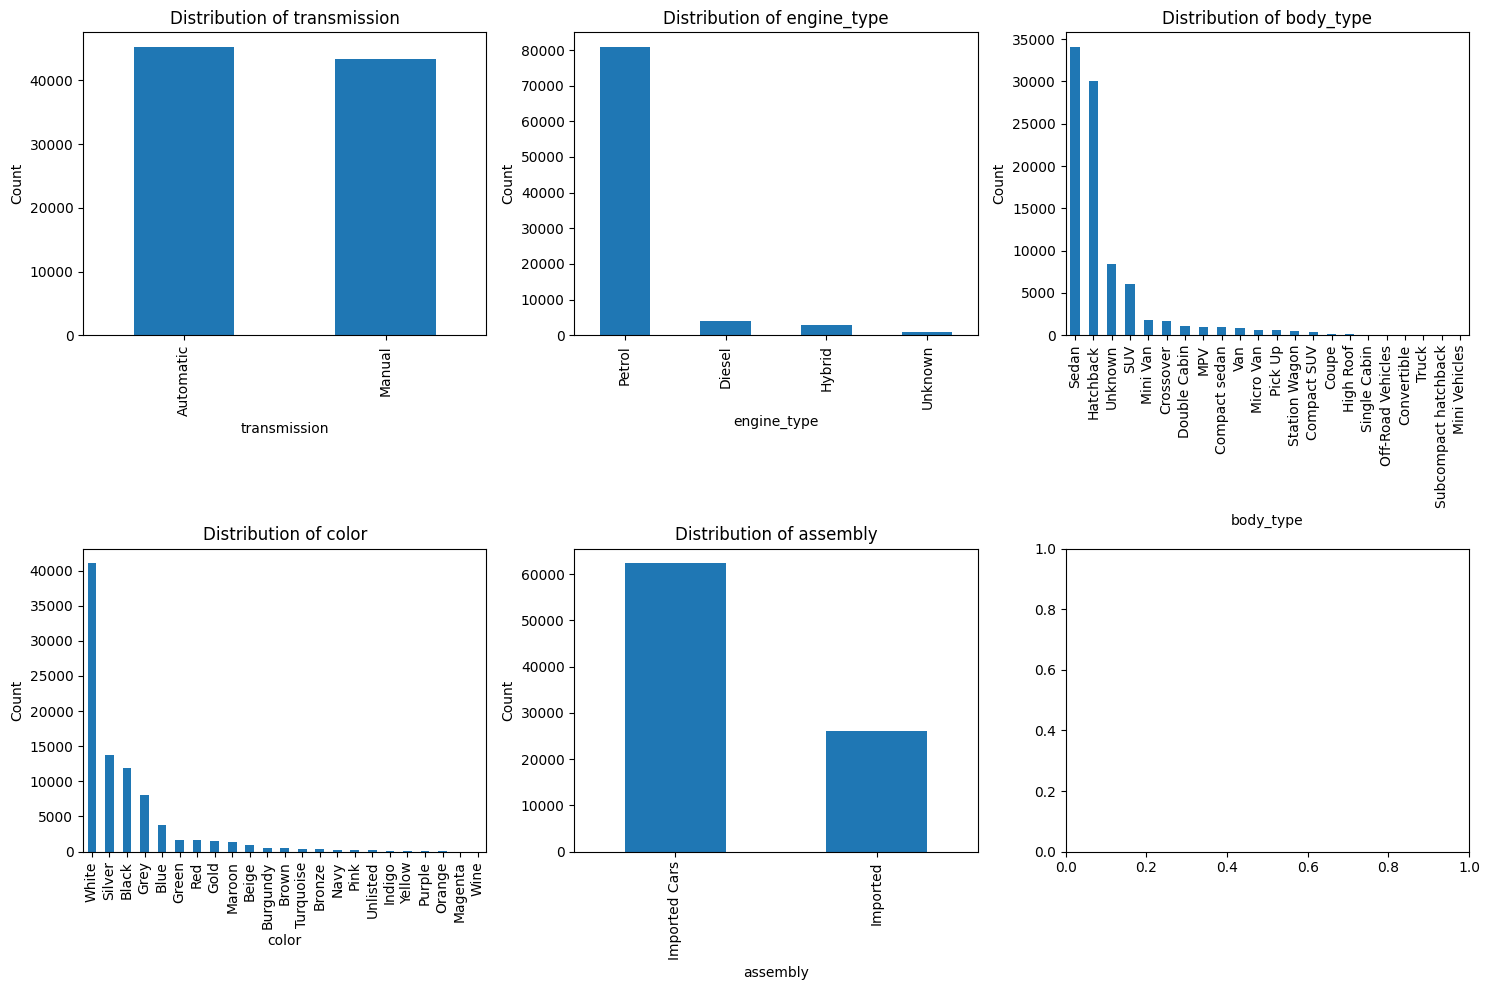

In [18]:
categorical_columns = ['transmission', 'engine_type', 'body_type', 'color', 'assembly']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))   
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    df[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()

### ii. Summary Statistics and Visualizations for Numeric Columns

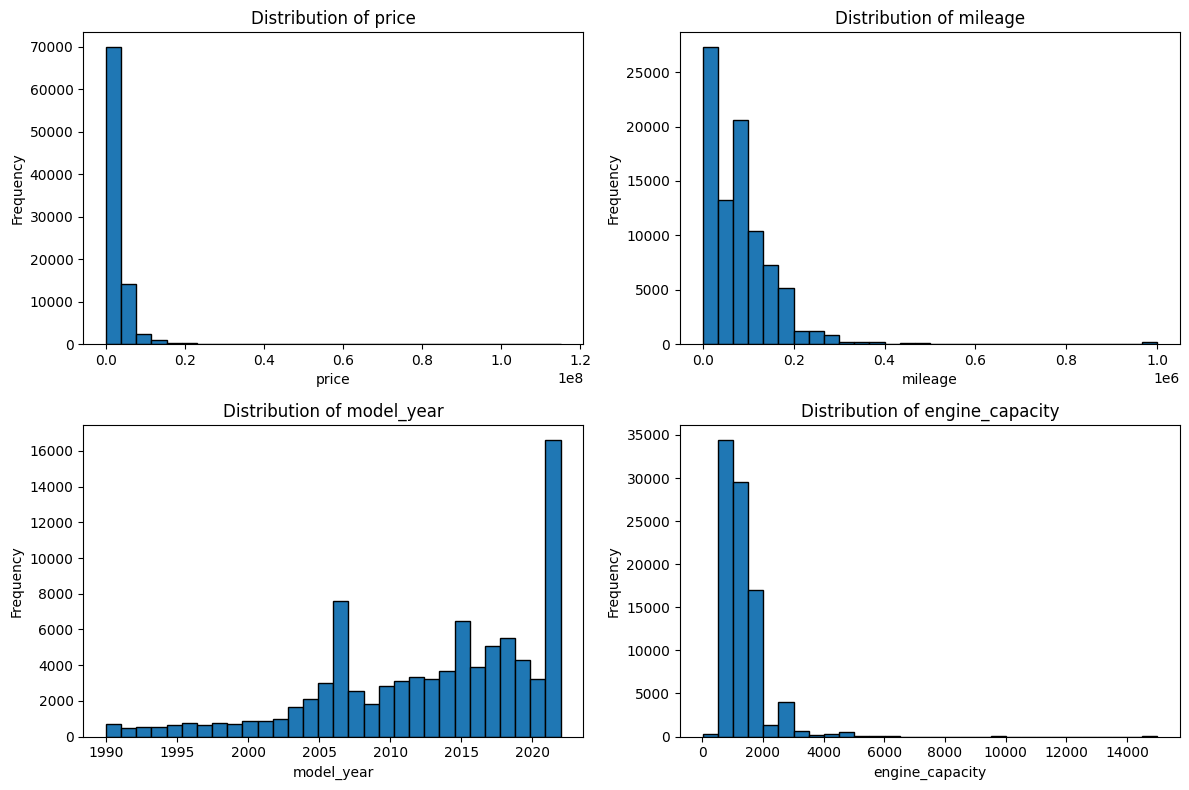

In [19]:
numerical_cols = ['price', 'mileage', 'model_year', 'engine_capacity']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col],bins=30, edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()

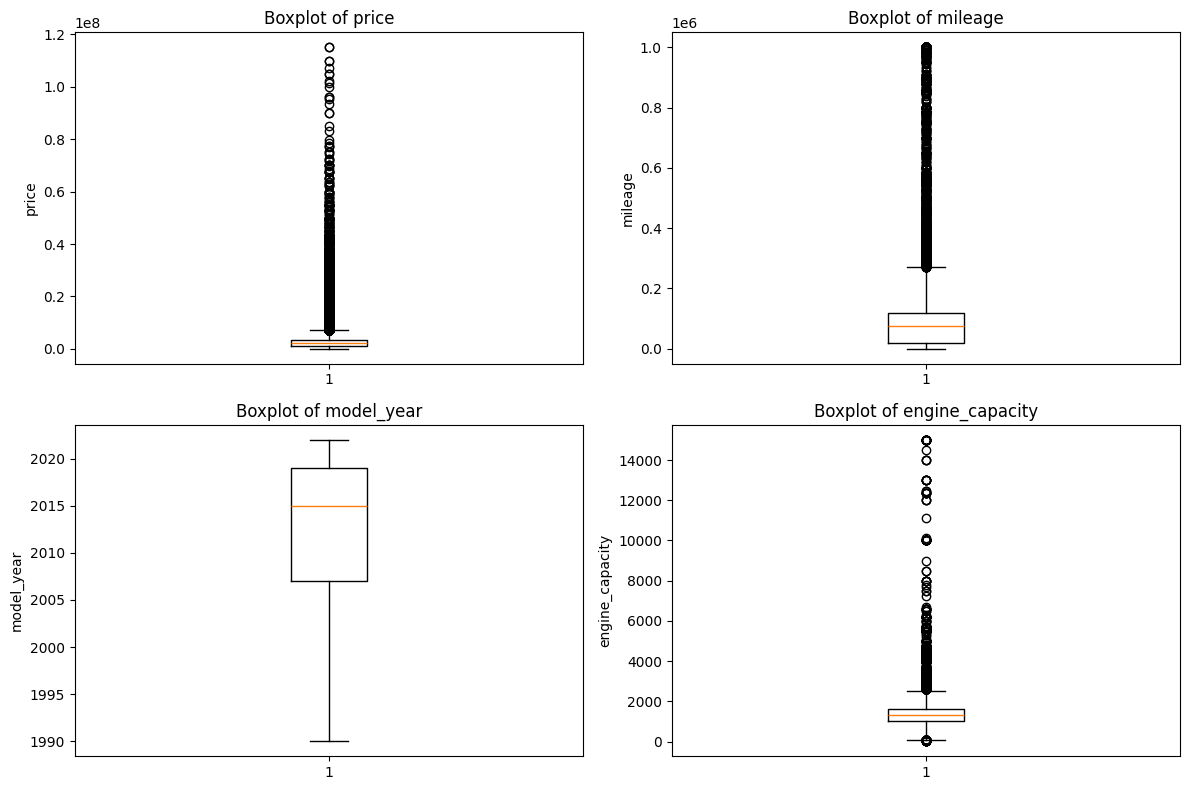

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].boxplot(df[col])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)

plt.tight_layout()

In [21]:
df[numerical_cols].describe()

,price,mileage,model_year,engine_capacity
count,8.854900e+04,88549.000000,88549.000000,88549.000000
mean,3.045594e+06,85061.127782,2012.830139,1398.680950
std,4.049545e+06,90745.182346,7.570911,731.660795
min,8.200000e+04,1.000000,1990.000000,16.500000
25%,1.180000e+06,20000.000000,2007.000000,1000.000000
50%,2.150000e+06,75000.000000,2015.000000,1300.000000
75%,3.590000e+06,120000.000000,2019.000000,1600.000000
max,1.150000e+08,1000000.000000,2022.000000,15000.000000


### iii. Comment on Skewness and Outlier and Needed Transformation

In [22]:
df[numerical_cols].skew()

price              8.616102
mileage            3.993176
model_year        -0.796346
engine_capacity    4.680423
dtype: float64

In [23]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f'{col}: {len(outliers)} outliers detected')

price: 5388 outliers detected
mileage: 2097 outliers detected
model_year: 0 outliers detected
engine_capacity: 5990 outliers detected


#### Skewness 
- Price (8.6), engine_capacity (4.7) are strongly right skewed
- Mileage (3.99) is also right-skewed.
- model_year(-0.79) s slightly left-skewed

#### Outlier summary
- Price: 5,388 outliers meaning expensive cars
- Engine_capacity: 5,990 outliers meaning very large engine capacity 
- Mileage: 2,097 outliers 
- Model_year: 0 outliers meaning all years fall in a normal range

#### Possible transformations   
Log transform could reduce skewness for price, mileage, and engine_capacity to make the distributions closer to normal.




## B. One-sample inference

We'll use `Price` column because I think it is most important variable in car dataset.   
We'll `Hypothesized_value` = Median of Price because we'll test if average car price equal median or not.  
We'll use `T-Test`, since we don't know **population std**. 

In [24]:
hypothesized_value = df['price'].median()

sample_mean = df['price'].mean()
sample_std = df['price'].std()
n = len(df['price'])

print(f'Sample size: {n}')
print(f'Sample mean: PKR {sample_mean}')
print(f'Sample standard deviation: PKR {sample_std}')
print(f'Hypothesized population median: PKR {hypothesized_value}\n')

print('HYPOTHESES')
print(f'H0 (Null): Population mean price = PKR {hypothesized_value}')
print(f'H1 (Alternative): Population mean price != PKR {hypothesized_value}\n')

t_stat, p_val = stats.ttest_1samp(df['price'], hypothesized_value)
print('TEST STATISTICS')
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_val}\n')

alpha = 0.05            # confidence_interval 0.95 means alpha = 0.05 
degree_freedom = n - 1
t_critical = stats.t.ppf(1 - alpha/2, degree_freedom)
margin_error = t_critical * (sample_std / np.sqrt(n))

ci_lower = sample_mean - margin_error
ci_upper = sample_mean + margin_error

print('95% CONFIDENCE INTERVAL')
print(f'[{ci_lower:.2f}, {ci_upper:.2f}]\n')

# Interpretation
if p_val < alpha:
    print('Reject H0. The mean price is significantly different from the median.')
else:
    print('Fail to reject H0. No significant difference between mean and median.')

Sample size: 88549
Sample mean: PKR 3045594.247252933
Sample standard deviation: PKR 4049545.139532749
Hypothesized population median: PKR 2150000.0

HYPOTHESES
H0 (Null): Population mean price = PKR 2150000.0
H1 (Alternative): Population mean price != PKR 2150000.0

TEST STATISTICS
T-statistic: 65.81075625148624
P-value: 0.0

95% CONFIDENCE INTERVAL
[3018921.46, 3072267.04]

Reject H0. The mean price is significantly different from the median.


In [24]:
hypothesized_value = df['price'].median()

sample_mean = df['price'].mean()
sample_std = df['price'].std()
n = len(df['price'])

print(f'Sample size: {n}')
print(f'Sample mean: PKR {sample_mean}')
print(f'Sample standard deviation: PKR {sample_std}')
print(f'Hypothesized population median: PKR {hypothesized_value}\n')

print('HYPOTHESES')
print(f'H0 (Null): Population mean price = PKR {hypothesized_value}')
print(f'H1 (Alternative): Population mean price != PKR {hypothesized_value}\n')

t_stat, p_val = stats.ttest_1samp(df['price'], hypothesized_value)
print('TEST STATISTICS')
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_val}\n')

alpha = 0.05            # confidence_interval 0.95 means alpha = 0.05 
degree_freedom = n - 1
t_critical = stats.t.ppf(1 - alpha/2, degree_freedom)
margin_error = t_critical * (sample_std / np.sqrt(n))

ci_lower = sample_mean - margin_error
ci_upper = sample_mean + margin_error

print('95% CONFIDENCE INTERVAL')
print(f'[{ci_lower:.2f}, {ci_upper:.2f}]\n')

# Interpretation
if p_val < alpha:
    print('Reject H0. The mean price is significantly different from the median.')
else:
    print('Fail to reject H0. No significant difference between mean and median.')

Sample size: 88549
Sample mean: PKR 3045594.247252933
Sample standard deviation: PKR 4049545.139532749
Hypothesized population median: PKR 2150000.0

HYPOTHESES
H0 (Null): Population mean price = PKR 2150000.0
H1 (Alternative): Population mean price != PKR 2150000.0

TEST STATISTICS
T-statistic: 65.81075625148624
P-value: 0.0

95% CONFIDENCE INTERVAL
[3018921.46, 3072267.04]

Reject H0. The mean price is significantly different from the median.


## C. Two Sample Comparison

We'll comppare prices between `Automatic` & `Manual` transmission cars and check if Automatic cars cost more than manual cars. 

In [25]:
groups = df.groupby('transmission')['price']
automatic = groups.get_group('Automatic')
manual = groups.get_group('Manual')

print('Sample Statistics for Automatic transmission: ')
print(f'Automatic cars: n = {len(automatic)}, mean = PKR {automatic.mean()}, std = PKR {automatic.std()}')
print('\nSample Statistics for Manual Transmission: ')
print(f'Manual cars: n = {len(manual)}, mean = PKR {manual.mean()}, std = PKR {manual.std()}\n')

print('Hypotheses')
print('H0 (Null): Mean price of automatic cars = Mean price of manual cars')
print('H1 (Alternative): Mean price of automatic cars != Mean price of manual cars\n')

#two-sample t-test 
t_stat, p_val = stats.ttest_ind(automatic, manual)

print('Test Statistics')
print(f'T-statistic: {t_stat:.4f}')
print(f'P-value: {p_val:.4f}\n')

# Significance level
alpha = 0.05

print('Method 1: Critical Value Approach')
degrees_freedom = min(len(automatic), len(manual)) - 1
t_critical = stats.t.ppf(1 - alpha/2, degrees_freedom)

print(f'Significance level (alpha): {alpha}')
print(f'Critical value (two-tailed): (+,-){t_critical:.4f}')
print(f'T-statistic: {t_stat:.4f}\n')

if abs(t_stat) > t_critical:
    print(f'Decision: REJECT H0 (|{t_stat:.4f}| > {t_critical:.4f})')
    print('Conclusion: Significant difference in prices between automatic and manual cars.\n')
else:
    print(f'Decision: FAIL TO REJECT H0 (|{t_stat:.4f}| <= {t_critical:.4f})')
    print('Conclusion: No significant difference in prices.\n')

print('Method 2: P-value Approach')
print(f'Significance level (alpha): {alpha}')
print(f'P-value: {p_val:.4f}\n')

if p_val < alpha:
    print(f'Decision: REJECT H0 ({p_val:.4f} < {alpha})')
    print('Conclusion: Significant difference in prices between automatic and manual cars.\n')
else:
    print(f'Decision: FAIL TO REJECT H0 ({p_val:.4f} >= {alpha})')
    print('Conclusion: No significant difference in prices.\n')


print('Final Interpretation')
if p_val < alpha:
    diff = automatic.mean() - manual.mean()
    if diff > 0:
        print(f'Automatic cars are significantly more expensive than manual cars by PKR {abs(diff):,.2f} on average.')
    else:
        print(f'Manual cars are significantly more expensive than automatic cars by PKR {abs(diff):,.2f} on average.')
else:
    print('There is no significant price difference between automatic and manual transmission cars.')

Sample Statistics for Automatic transmission: 
Automatic cars: n = 45273, mean = PKR 4560973.206988713, std = PKR 5152170.5613853

Sample Statistics for Manual Transmission: 
Manual cars: n = 43276, mean = PKR 1460287.110638691, std = PKR 932356.6105865586

Hypotheses
H0 (Null): Mean price of automatic cars = Mean price of manual cars
H1 (Alternative): Mean price of automatic cars != Mean price of manual cars

Test Statistics
T-statistic: 123.2815
P-value: 0.0000

Method 1: Critical Value Approach
Significance level (alpha): 0.05
Critical value (two-tailed): (+,-)1.9600
T-statistic: 123.2815

Decision: REJECT H0 (|123.2815| > 1.9600)
Conclusion: Significant difference in prices between automatic and manual cars.

Method 2: P-value Approach
Significance level (alpha): 0.05
P-value: 0.0000

Decision: REJECT H0 (0.0000 < 0.05)
Conclusion: Significant difference in prices between automatic and manual cars.

Final Interpretation
Automatic cars are significantly more expensive than manual ca

## D. Multiple-group comparison

In [26]:
df['brand'] = df['title'].str.split().str[0]
print(df['brand'].value_counts().head(15))

brand
Toyota        28512
Suzuki        26715
Honda         17207
Daihatsu       3147
KIA            2515
Nissan         1717
Hyundai        1632
Changan        1354
Mitsubishi     1207
Mercedes        707
MG              598
DFSK            318
FAW             308
Audi            273
Proton          250
Name: count, dtype: int64


In [27]:
print(df['brand'].unique())

['Honda' 'Suzuki' 'Toyota' 'Alfa' 'Changan' 'KIA' 'Mitsubishi' 'Ford'
 'Lexus' 'Adam' 'Nissan' 'Daihatsu' 'FAW' 'Mercedes' 'Haval' 'MG'
 'Hyundai' 'Mazda' 'Proton' 'DFSK' 'BMW' 'Prince' 'MINI' 'JAC' 'Audi'
 'BAIC' 'Land' 'Jeep' 'Daewoo' 'Chevrolet' 'Chery' 'Isuzu' 'Others' 'Fiat'
 'Chrysler' 'Peugeot' 'Volkswagen' 'Porsche' 'Sogo' 'Roma' 'Cadillac'
 'Classic' 'Range' 'United' 'GMC' 'Subaru' 'Dodge' 'Willys' 'JW' 'Austin'
 'Bentley' 'Master' 'SsangYong' 'Daehan' 'Hino' 'Datsun' 'Tesla' 'JMC'
 'Jaguar' 'Volvo' 'Buick' 'Geely' 'Dongfeng' 'Rinco' 'Vauxhall' 'ZOTYE'
 'Hummer' 'Mushtaq' 'Golden' 'Citroen' 'Opel' 'Oldsmobile']


In [28]:
# Standardize brand names to title case
df['brand'] = df['brand'].str.title()

# Check again
print(df['brand'].value_counts().head(10))

brand
Toyota        28512
Suzuki        26715
Honda         17207
Daihatsu       3147
Kia            2515
Nissan         1717
Hyundai        1632
Changan        1354
Mitsubishi     1207
Mercedes        707
Name: count, dtype: int64


In [29]:
# Using top 3 brands (Toyota, Suzuki, Honda)
top_brands = ['Toyota', 'Suzuki', 'Honda']
df_brands = df[df['brand'].isin(top_brands)]

print('\nChecking Assumptions')
normality_ok = True
for brand in top_brands:
    brand_prices = df_brands[df_brands['brand'] == brand]['price']
    mean_val = brand_prices.mean()
    median_val = brand_prices.median()
    diff_pct = abs(mean_val - median_val) / median_val * 100
    
    print(f'\n{brand}:')
    print(f'Mean:   Rs. {mean_val:.0f}')
    print(f'Median: Rs. {median_val:.0f}')
    print(f'Difference: {diff_pct:.1f}%')
    
    if diff_pct > 10:
        print(f'SKEWED (mean != median)')
        normality_ok = False
    else:
        print(f'Roughly symmetric')

print('*'*70)
if normality_ok:
    print('All groups are normally distributed')
else:
    print('Groups are skewed.')



Checking Assumptions

Toyota:
Mean:   Rs. 4209565
Median: Rs. 3050000
Difference: 38.0%
SKEWED (mean != median)

Suzuki:
Mean:   Rs. 1340421
Median: Rs. 1100000
Difference: 21.9%
SKEWED (mean != median)

Honda:
Mean:   Rs. 2903696
Median: Rs. 2600000
Difference: 11.7%
SKEWED (mean != median)
**********************************************************************
Groups are skewed.


As normality test failed, so without check for homogeneity of variances we'll direclty perform Kruskal-Wallis test. 

In [30]:
# Prepare groups
toyota_prices = df_brands[df_brands['brand'] == 'Toyota']['price']
suzuki_prices = df_brands[df_brands['brand'] == 'Suzuki']['price']
honda_prices = df_brands[df_brands['brand'] == 'Honda']['price']

print('\nH0: Median prices are equal across all brands')
print('H1: At least one brand has a different median price\n')

h_stat, p_value = stats.kruskal(toyota_prices, suzuki_prices, honda_prices)
print(f'H-statistic: {h_stat:.4f}')
print(f'P-value: {p_value:.6f}')

print('\nResults and Interpretation')

# At 5% significance level
print('\n1. At alpha = 0.05 (5% significance level):')
if p_value < 0.05:
    print('Reject H0: Prices differ significantly across brands.')
else:
    print('Failed to reject H0: No significant differences in prices across brands.')

# At 1% significance level
print('\n2. At alpha = 0.01 (1% significance level):')
if p_value < 0.01:
    print('Reject H0: Price differ across brands.')
else:
    print('Failed to reject H0: Difference is not significant at 1% level.')

# Show summary statistics
print('\nSummary Statistics by Brands: ')
summary = df_brands.groupby('brand')['price'].agg(['count', 'mean', 'median', 'std'])
print(summary)


H0: Median prices are equal across all brands
H1: At least one brand has a different median price

H-statistic: 24249.2471
P-value: 0.000000

Results and Interpretation

1. At alpha = 0.05 (5% significance level):
Reject H0: Prices differ significantly across brands.

2. At alpha = 0.01 (1% significance level):
Reject H0: Price differ across brands.

Summary Statistics by Brands: 
        count          mean     median           std
brand                                               
Honda   17207  2.903696e+06  2600000.0  1.726318e+06
Suzuki  26715  1.340421e+06  1100000.0  8.061131e+05
Toyota  28512  4.209565e+06  3050000.0  4.963873e+06


## E. Effect of Significance level 

In [31]:
print(f"H0: Median prices are equal across all brands")
print(f"H1: At least one brand has a different median price\n")

print(f"H-statistic: {h_stat:.4f}")
print(f"P-value: {p_value:.6f}\n")


alpha_levels = [0.05, 0.01]

for alpha in alpha_levels:
    if p_value < alpha:
        print(f"At alpha = {alpha:.2f}: reject H0 means prices differ significantly across brands")
    else:
        print(f"At alpha = {alpha:.2f}: fail to reject H0 means no significant difference\n")


H0: Median prices are equal across all brands
H1: At least one brand has a different median price

H-statistic: 24249.2471
P-value: 0.000000

At alpha = 0.05: reject H0 means prices differ significantly across brands
At alpha = 0.01: reject H0 means prices differ significantly across brands


**Conclusion**  
- Changing the significance level from 5% to 1% does NOT change our decision.  
- The p-value is extremely small, showing very strong evidence that at least one brand has a different median price.  
- Looking at summary statistics, mean and median prices differ a lot across Toyota, Suzuki, and Honda, confirming this result.  

## F. Correltations

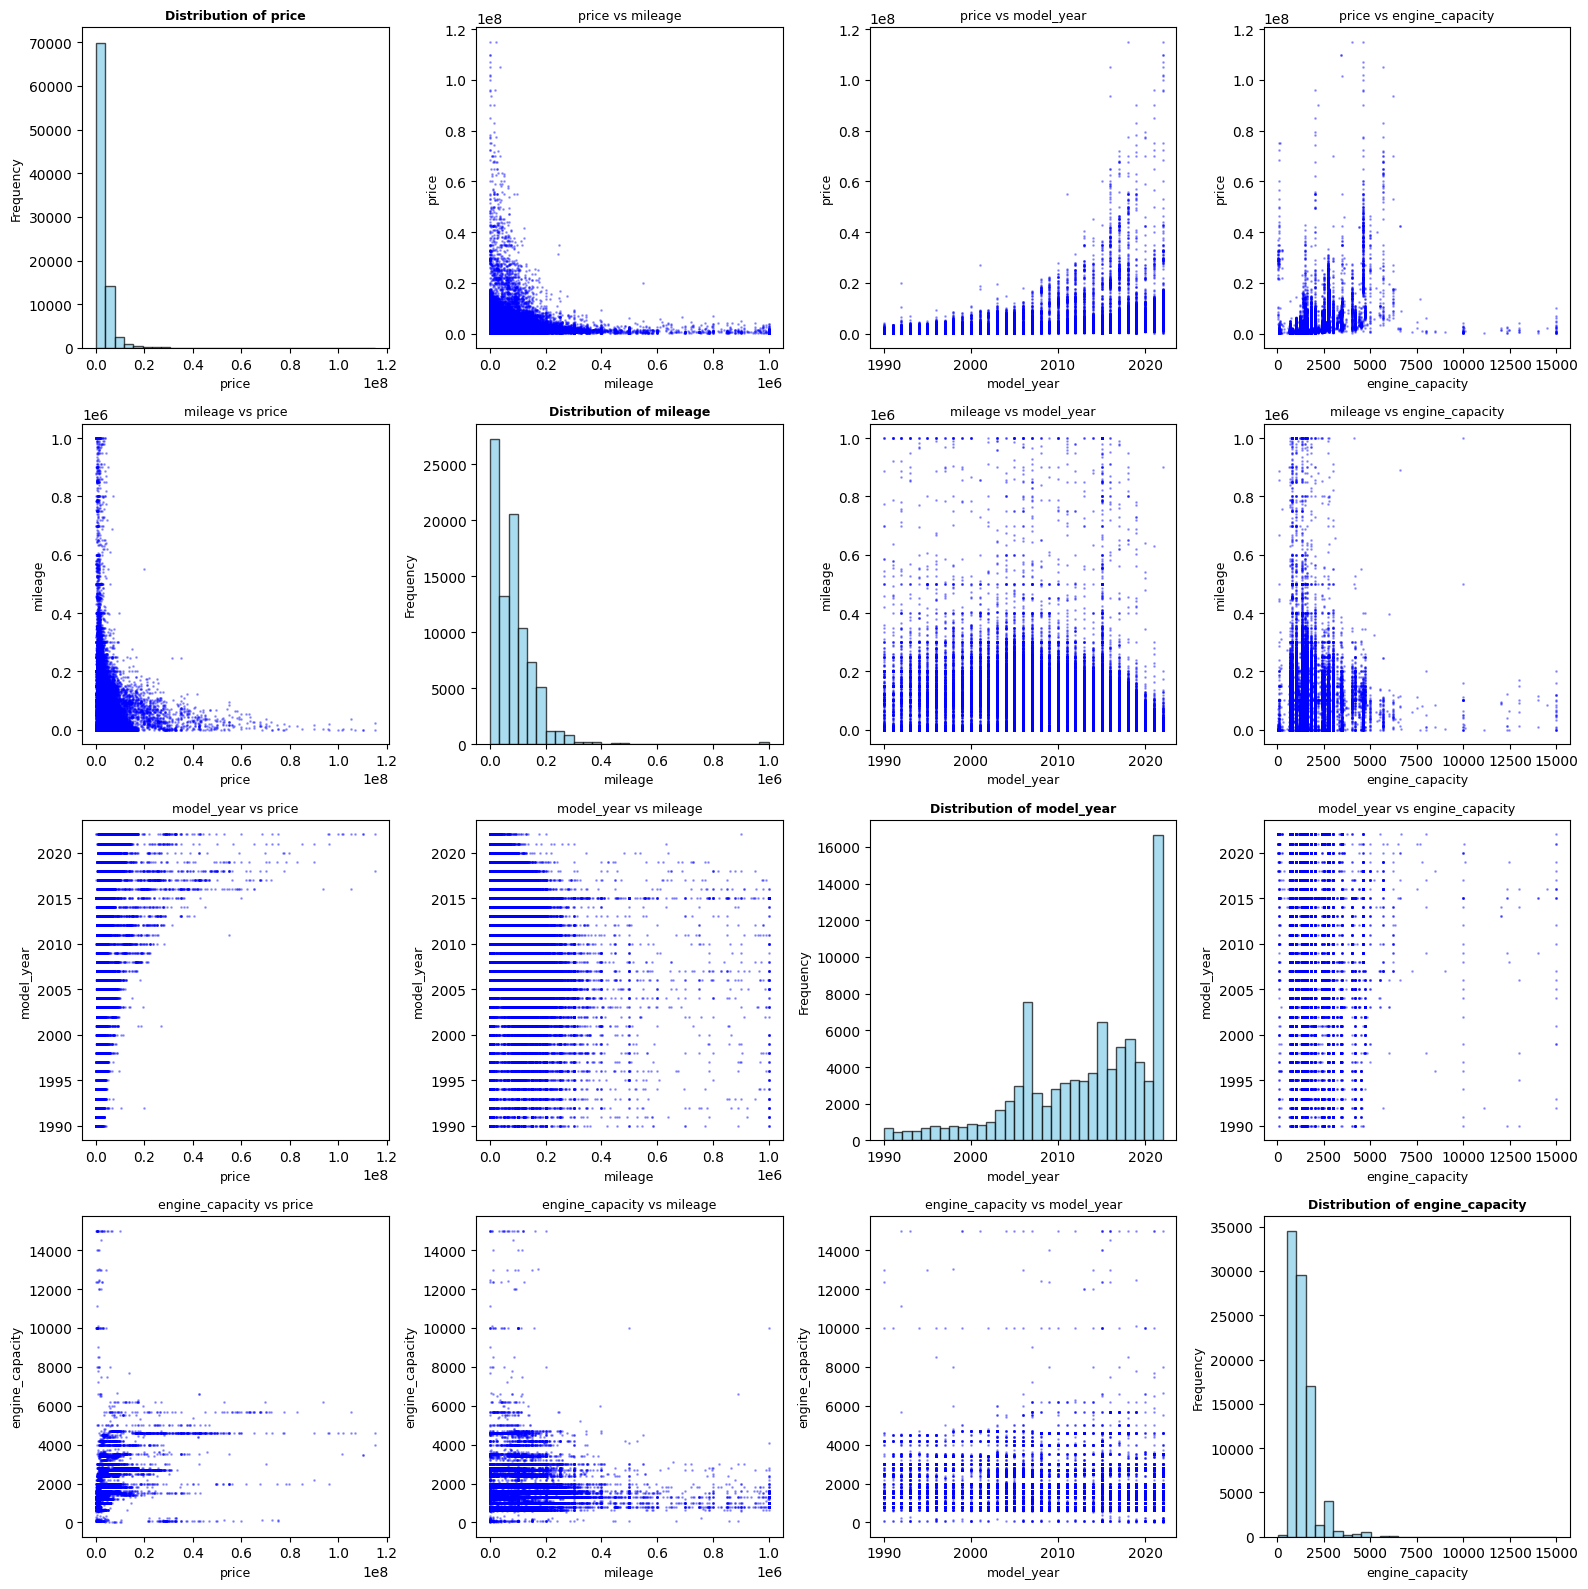

In [32]:
#  Plot scatter chart for all pair of numeric attributes

numerical_cols = ['price', 'mileage', 'model_year', 'engine_capacity']

# Create scatter plot matrix
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

for i, col1 in enumerate(numerical_cols):
    for j, col2 in enumerate(numerical_cols):
        ax = axes[i, j]
        if i == j:
            # Diagonal: show histogram
            ax.hist(df[col1], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
            ax.set_title(f'Distribution of {col1}', fontsize=9, fontweight='bold')
            ax.set_xlabel(col1, fontsize=9)
            ax.set_ylabel('Frequency', fontsize=9)
        else:
            # Off-diagonal: show scatter plot
            ax.scatter(df[col2], df[col1], alpha=0.3, s=1, color='blue')
            ax.set_title(f'{col1} vs {col2}', fontsize=9)
            ax.set_xlabel(col2, fontsize=9)
            ax.set_ylabel(col1, fontsize=9)

plt.tight_layout()

                    price   mileage  model_year  engine_capacity
price            1.000000 -0.193718    0.315504         0.489777
mileage         -0.193718  1.000000   -0.427592         0.041092
model_year       0.315504 -0.427592    1.000000        -0.069810
engine_capacity  0.489777  0.041092   -0.069810         1.000000

Creating correlation heatmap...



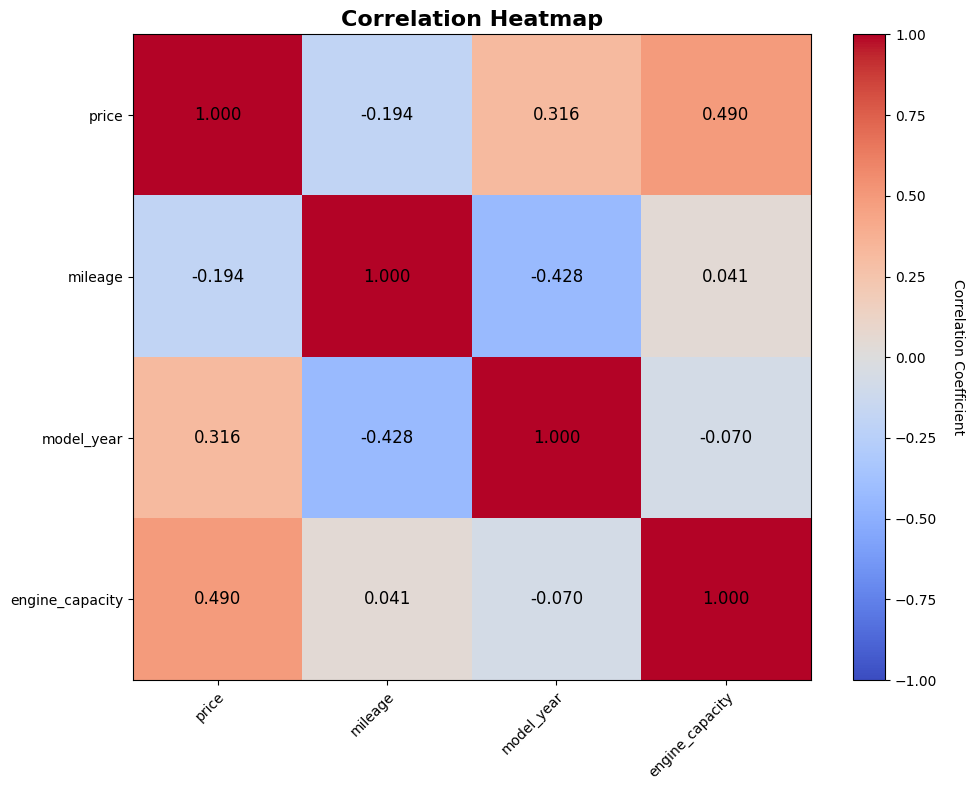

In [33]:
# Compute correlations between all the numeric features and show the results in a heatmap chart

correlation_matrix = df[numerical_cols].corr()
print(correlation_matrix)

print('\nCreating correlation heatmap...\n')
fig, ax = plt.subplots(figsize=(10, 8))
# Create heatmap
im = ax.imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)

# Set ticks and labels
ax.set_xticks(np.arange(len(numerical_cols)))
ax.set_yticks(np.arange(len(numerical_cols)))
ax.set_xticklabels(numerical_cols)
ax.set_yticklabels(numerical_cols)

# Rotate the tick labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Correlation Coefficient', rotation=270, labelpad=20)

# Add correlation values as text
for i in range(len(numerical_cols)):
    for j in range(len(numerical_cols)):
        text = ax.text(j, i, f'{correlation_matrix.iloc[i, j]:.3f}',
                      ha='center', va='center', color='black', fontsize=12)

ax.set_title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()

In [34]:

# Report correlation coefficients, p-values, and CIs and interpret the results.
pairs = [
    ('price', 'mileage'),
    ('price', 'model_year'),
    ('price', 'engine_capacity'),
    ('mileage', 'model_year'),
    ('mileage', 'engine_capacity'),
    ('model_year', 'engine_capacity')
]

for var1, var2 in pairs:
    data1 = df[var1].dropna()
    data2 = df[var2].dropna()

    valid_indices = df[[var1, var2]].dropna().index
    data1 = df.loc[valid_indices, var1]
    data2 = df.loc[valid_indices, var2]
    
    r, p_val = pearsonr(data1, data2)

    n = len(data1)
    z = np.arctanh(r)
    se = 1 / np.sqrt(n - 3)
    z_critical = 1.96
    ci_lower = np.tanh(z - z_critical * se)
    ci_upper = np.tanh(z + z_critical * se)
    
    print(f'{var1} vs {var2}:')
    print(f'Correlation coefficient (r): {r:.4f}')
    print(f'P-value: {p_val:.4f}')
    print(f'95% CI: [{ci_lower:.4f}, {ci_upper:.4f}]')
    
    if p_val < 0.05:
        print(f'Significant correlation (p < 0.05)')
    else:
        print(f'Not significant (p >= 0.05)')
    
    # Interpretation
    if abs(r) < 0.3:
        strength = 'weak'
    elif abs(r) < 0.7:
        strength = 'moderate'
    else:
        strength = 'strong'
    
    direction = 'positive' if r > 0 else 'negative'
    print(f'Interpretation: {strength} {direction} correlation\n')

price vs mileage:
Correlation coefficient (r): -0.1937
P-value: 0.0000
95% CI: [-0.2000, -0.1874]
Significant correlation (p < 0.05)
Interpretation: weak negative correlation

price vs model_year:
Correlation coefficient (r): 0.3155
P-value: 0.0000
95% CI: [0.3096, 0.3214]
Significant correlation (p < 0.05)
Interpretation: moderate positive correlation

price vs engine_capacity:
Correlation coefficient (r): 0.4898
P-value: 0.0000
95% CI: [0.4848, 0.4948]
Significant correlation (p < 0.05)
Interpretation: moderate positive correlation

mileage vs model_year:
Correlation coefficient (r): -0.4276
P-value: 0.0000
95% CI: [-0.4330, -0.4222]
Significant correlation (p < 0.05)
Interpretation: moderate negative correlation

mileage vs engine_capacity:
Correlation coefficient (r): 0.0411
P-value: 0.0000
95% CI: [0.0345, 0.0477]
Significant correlation (p < 0.05)
Interpretation: weak positive correlation

model_year vs engine_capacity:
Correlation coefficient (r): -0.0698
P-value: 0.0000
95% CI:

## G. Bootstrapping

Repeating Part B (One-Sample Test) using Bootstrapping

Original sample size: 88549
Hypothesized mean (median): PKR 2,150,000.00
Number of bootstrap iterations: 1000

Bootstrap Results: 
Bootstrap mean of means: PKR 3,045,136.54
Bootstrap std of means: PKR 13,708.33
Original sample mean: PKR 3,045,594.25

95% CI
CI: [PKR 3,019,383.93, PKR 3,073,586.32]

Bootstrap Hypotheses test: 
H0: Population mean = PKR 2,150,000.00
Bootstrap p-value: 0.0000

Decision: reject H0 (p-value 0.0000 < 0.05)

Comparison with original t-test from Part B

Original T-Test Results:
T-statistic: 65.8108
P-value: 0.0000
95% CI: [PKR 3018921.61, PKR 3072266.89]

Bootstrap Results:
P-value: 0.0000
95% CI: [PKR 3019383.93, PKR 3073586.32]

Comparison:
Original CI width: PKR 53345.28
Bootstrap CI width: PKR 54202.39



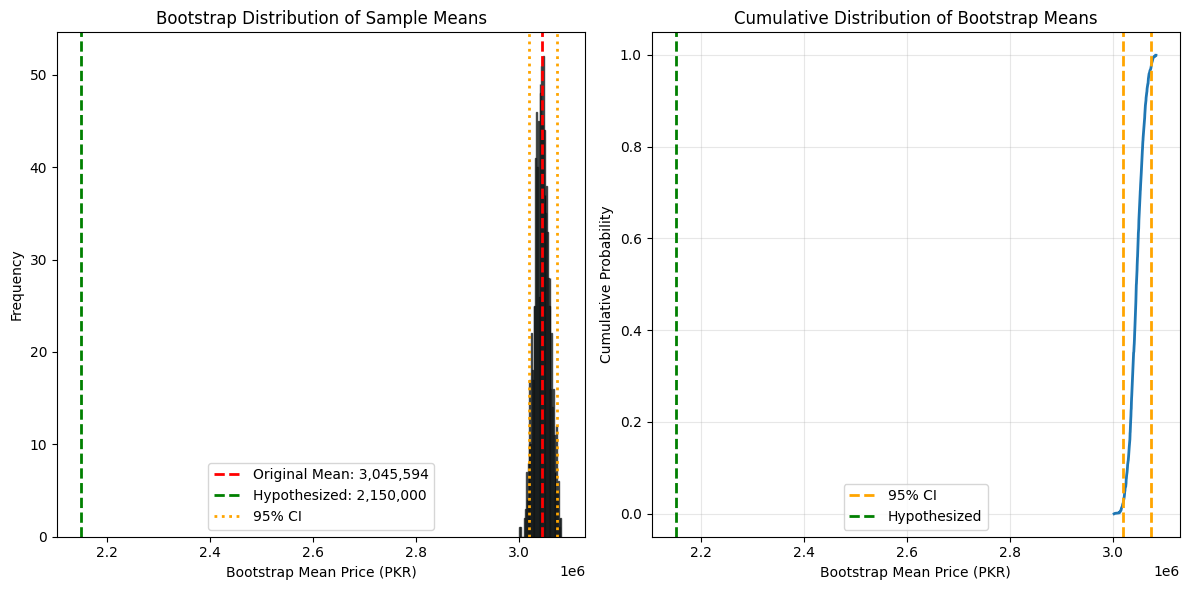

In [35]:
# We'll repeat the one-sample t-test from Part B using bootstrapping
# Testing: Does mean price equal median price?

print('Repeating Part B (One-Sample Test) using Bootstrapping\n')

original_sample = df['price'].values
hypothesized_mean = df['price'].median()
n_iterations = 1000

print(f'Original sample size: {len(original_sample)}')
print(f'Hypothesized mean (median): PKR {hypothesized_mean:,.2f}')
print(f'Number of bootstrap iterations: {n_iterations}\n')

# Store bootstrap means
bootstrap_means = []

# Perform bootstrapping
np.random.seed(42)  
for i in range(n_iterations):
    bootstrap_sample = np.random.choice(original_sample, size=len(original_sample), replace=True)
    bootstrap_means.append(bootstrap_sample.mean())

bootstrap_means = np.array(bootstrap_means)

print('Bootstrap Results: ')
print(f'Bootstrap mean of means: PKR {bootstrap_means.mean():,.2f}')
print(f'Bootstrap std of means: PKR {bootstrap_means.std():,.2f}')
print(f'Original sample mean: PKR {original_sample.mean():,.2f}\n')

# Calculate 95% confidence interval using percentile method
ci_lower = np.percentile(bootstrap_means, 2.5)
ci_upper = np.percentile(bootstrap_means, 97.5)

print('95% CI')
print(f'CI: [PKR {ci_lower:,.2f}, PKR {ci_upper:,.2f}]\n')

# Hypothesis test using bootstrap
# Count how many bootstrap means are as extreme as hypothesized value
if original_sample.mean() > hypothesized_mean:
    p_value_bootstrap = np.sum(bootstrap_means <= hypothesized_mean) / n_iterations
else:
    p_value_bootstrap = np.sum(bootstrap_means >= hypothesized_mean) / n_iterations

# Two-tailed p-value
p_value_bootstrap = 2 * min(p_value_bootstrap, 1 - p_value_bootstrap)

print('Bootstrap Hypotheses test: ')
print(f'H0: Population mean = PKR {hypothesized_mean:,.2f}')
print(f'Bootstrap p-value: {p_value_bootstrap:.4f}\n')

alpha = 0.05
if p_value_bootstrap < alpha:
    print(f'Decision: reject H0 (p-value {p_value_bootstrap:.4f} < {alpha})')
else:
    print(f'Decision: fail to reject H0 (p-value {p_value_bootstrap:.4f} >= {alpha})')

# Visualize bootstrap distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(bootstrap_means, bins=50, edgecolor='black', alpha=0.7, color='lightblue')
plt.axvline(original_sample.mean(), color='red', linestyle='--', linewidth=2, label=f'Original Mean: {original_sample.mean():,.0f}')
plt.axvline(hypothesized_mean, color='green', linestyle='--', linewidth=2, label=f'Hypothesized: {hypothesized_mean:,.0f}')
plt.axvline(ci_lower, color='orange', linestyle=':', linewidth=2, label=f'95% CI')
plt.axvline(ci_upper, color='orange', linestyle=':', linewidth=2)
plt.xlabel('Bootstrap Mean Price (PKR)')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of Sample Means')
plt.legend()

plt.subplot(1, 2, 2)
sorted_means = np.sort(bootstrap_means)
plt.plot(sorted_means, np.arange(len(sorted_means)) / len(sorted_means), linewidth=2)
plt.axvline(ci_lower, color='orange', linestyle='--', linewidth=2, label='95% CI')
plt.axvline(ci_upper, color='orange', linestyle='--', linewidth=2)
plt.axvline(hypothesized_mean, color='green', linestyle='--', linewidth=2, label='Hypothesized')
plt.xlabel('Bootstrap Mean Price (PKR)')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of Bootstrap Means')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()

# Compare with original t-test from Part B
print('\nComparison with original t-test from Part B\n')

# Original t-test results
t_stat_original, p_val_original = stats.ttest_1samp(original_sample, hypothesized_mean)

sample_mean = original_sample.mean()
sample_std = original_sample.std()
n = len(original_sample)
degrees_freedom = n - 1
t_critical = stats.t.ppf(0.975, degrees_freedom)
margin_error = t_critical * (sample_std / np.sqrt(n))
ci_lower_original = sample_mean - margin_error
ci_upper_original = sample_mean + margin_error

print('Original T-Test Results:')
print(f'T-statistic: {t_stat_original:.4f}')
print(f'P-value: {p_val_original:.4f}')
print(f'95% CI: [PKR {ci_lower_original:.2f}, PKR {ci_upper_original:.2f}]\n')

print('Bootstrap Results:')
print(f'P-value: {p_value_bootstrap:.4f}')
print(f'95% CI: [PKR {ci_lower:.2f}, PKR {ci_upper:.2f}]\n')

print('Comparison:')
print(f'Original CI width: PKR {(ci_upper_original - ci_lower_original):.2f}')
print(f'Bootstrap CI width: PKR {(ci_upper - ci_lower):.2f}\n')

**Conclusion:**  
Both methods lead to the **SAME decision: REJECT H0**

**Why bootstrapping has similar results:**  
- Large sample size (n = 88,549) makes parametric assumptions less critical  
- Central Limit Theorem ensures sampling distribution is approximately normal  
- Bootstrap CI and t-test CI are very similar in width and location  

**When would bootstrapping show different results?**  
- Small sample sizes (n < 30)  
- Highly skewed distributions  
- Presence of extreme outliers  
- Non-normal distributions with small samples
